ЛАБОРАТОРНАЯ РАБОТА 8. ПОСТРОЕНИЕ ПАЙПЛАЙНА ОДНОМЕРНОЙ РЕГРЕССИИ

Цели и задачи

Цель лабораторной работы: разработка единого пайплайна для решения задачи регрессии.
Основные задачи:
–	реализовать каонвейер для выполнения всех стадий обработки данных при решении задачи одномерной регрессии;
–	получение теоретических представлений о задаче регресии;
–	получение навыков использования пайплайна при решении задачи машинного обучения;
–	получение навыков рефакторинга кода в задачах машинного обучения.
  
Теоретическое обоснование

Для решения задачи одномерной регрессии необходимо использовать универсальный пайплайн предварительной обработки данных. К имеющемусяя шаблонному коду необходимо добавить код для обучения модели, интерпретации и визуализации результатов.
Линейная регрессия – метод восстановления зависимости между двумя переменными. Пусть задана модель регрессии – параметрическое семейство функций 𝑔(𝑥, 𝛼), где 𝛼 ∈ ℝ𝑝 – вектор параметров модели. Определим функционал качества аппроксимации целевой зависимости на выборке 𝑋ℓ как сумму квадратов ошибок:

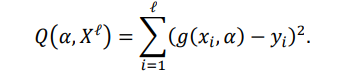

Обучение по методу наименьших квадратов (МНК) состоит в том, чтобы найти вектор параметров 𝛼∗, при котором достигается минимум среднего квадрата ошибки на заданной обучающей выборке 𝑋ℓ

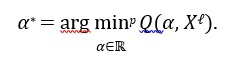

Стандартный способ решения этой оптимизационной задачи – воспользоваться необходимым условием минимума. Если функция 𝑔(𝑥, 𝛼) достаточное число раз дифференцируема по 𝛼, то в точке минимума выполняется система 𝑝 уравнений относительно 𝑝 неизвестных:

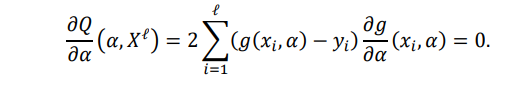

С использованием библиотек машинного обучения формулы (8.1) – (8.2) можно реализовать автоматически, но следует понимать, что конкретно реализует каждый метод.

Оборудование и материалы

Для выполнения лабораторной работы рекомендуется использовать персональный компьютер со следующими программными средствами разработки (выбрать один или несколько програмных продуктов для практической реализации задач лабораторной работы): MS Visual Studio 2015 и выше; среда разработки Java, интерпретатор Python (Jupyter Notebook) с библиотеками matplotlib, seaborn, numpy.

Методика и порядок выполнения работы

Перед выполнением индивидуального задания рекомендуется выполнить все пункты учебной задачи.

Постановка задачи.
Устовие. Построить пайплайн, реализующий решение задачи линейной одномерной регрессии.
Решение. Для решения задачи необходимо написать скрипт на яыке Python


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./Salary_Data.csv')
dataset.head()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

In [ ]:
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(x_test)
print(y_pred)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Salary vs Experience (Test set)")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Индивидуальное задание
1.	Подберите набор данных на ресурсах [5-7] и согласуйте свой выбор с преподавателем. Студент может предложить набор данных в соответствии с тематикой магистерского исследования.
2.	Постройте модель регрессии.

Содержание отчета и его форма

Отчет по лабораторной работе должен содержать:
1.	Номер и название лабораторной работы; задачи лабораторной работы.
2.	Реализация каждого пункта подраздела «Индивидуальное задание» с приведением исходного кода программы, диаграмм и графиков для визуализации данных.
3.	Ответы на контрольные вопросы.
4.	Экранные формы (консольный вывод) и листинг программного кода с комментариями, показывающие порядок выполнения лабораторной работы, и результаты, полученные в ходе её выполнения.
Отчет о выполнении лабораторной работы сдается преподавателю.

Контрольные вопросы

1.	Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?
2.	Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?
3.	Что именно реализовано в методе fit(X, y) класса LinearRegression?  
4.	Что такое p-значение? Как p-значение используется при оптимизации моделей регрессии?
5.	Поясните назначение метода predict класса LinearRegression.
6.	Поясните назначение метода plot и scatter класса pyplot.
7.	По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?

Список литературы

Для выполнения лабораторной работы, при подготовке к защите, а также для ответа на контрольные вопросы рекомендуется использовать следующие
источники: [1, 2, 5-7].


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета
dataset = pd.read_csv('WineQT.csv')

In [16]:
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


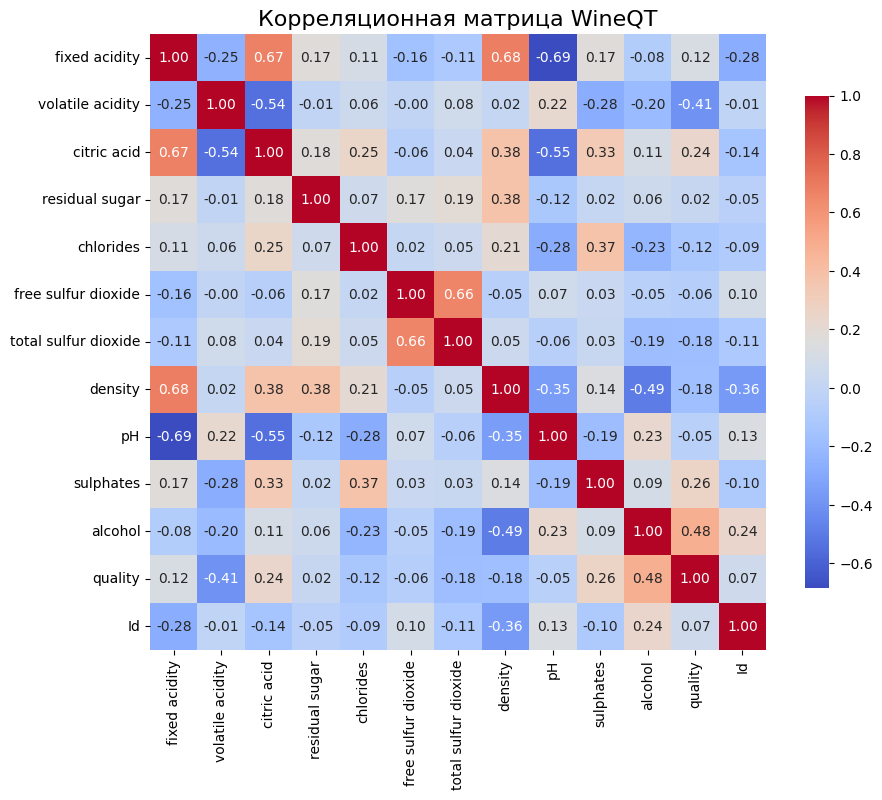

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
dataset = pd.read_csv('WineQT.csv')

# Вычисление корреляционной матрицы
correlation_matrix = dataset.corr()

# Настройка графика
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Заголовок графика
plt.title('Корреляционная матрица WineQT', fontsize=16)
plt.show()

Матрица признаков (fixed acidity):
[[ 7.4]
 [ 7.8]
 [ 7.8]
 [11.2]
 [ 7.4]]
Зависимая переменная (pH):
[3.51 3.2  3.26 3.16 3.51]
Предсказанные значения pH:
[3.26561712 3.40327349 3.26561712 3.27187423 3.37824506 3.43455903
 3.35947374 3.25310291 3.39701639 3.05287546 3.24058869 3.36573085
 3.4095306  3.35321663 3.30941688 3.27813134 3.39075928 3.34695952
 3.30941688 3.38450217 3.11544654 3.32193109 3.34695952 3.35947374
 3.37824506 3.21556026 3.35321663 3.25310291 3.33444531 3.41578771
 3.27187423 3.39701639 3.46584457 3.11544654 3.20930315 3.42204482
 3.43455903 3.10918943 3.34695952 3.39701639 3.36573085 3.38450217
 3.20930315 3.33444531 3.38450217 3.22807448 3.45958747 3.25310291
 3.20930315 3.47835879 3.29690266 2.86516222 3.39075928 3.27813134
 3.35947374 3.28438845 3.21556026 3.34695952 3.22181737 3.34695952
 3.33444531 3.28438845 3.43455903 3.31567399 3.28438845 3.29690266
 3.43455903 3.29064555 3.42204482 3.35321663 3.35321663 3.21556026
 3.4095306  3.27813134 3.23433158 3.278

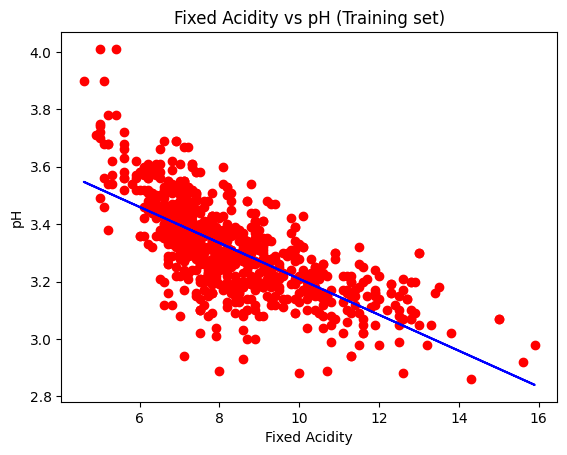

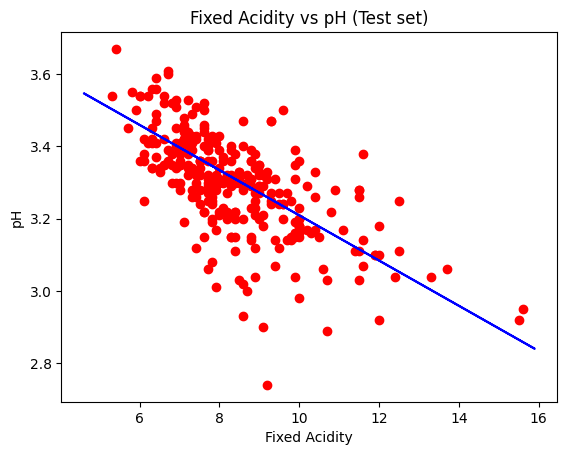

In [17]:
# Выбор признаков и зависимой переменной
X = dataset[['fixed acidity']].values  # Используем fixed acidity как независимую переменную
y = dataset['pH'].values  # Используем pH как зависимую переменную
print("Матрица признаков (fixed acidity):")
print(X[:5])
print("Зависимая переменная (pH):")
print(y[:5])

# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)

# Обучение модели линейной регрессии
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = regressor.predict(X_test)
print("Предсказанные значения pH:")
print(y_pred)

# Визуализация результатов на обучающей выборке
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Fixed Acidity vs pH (Training set)')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show()

# Визуализация результатов на тестовой выборке
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Fixed Acidity vs pH (Test set)')
plt.xlabel('Fixed Acidity')
plt.ylabel('pH')
plt.show()